# Notebook destinado a Parte 3 - Validação Holdout em Problema Não-Linearmente Separável
## Colaboradores: Jakson Protázio, Nadine Brito e Lucas Araújo

Novamente importaremos as bibliotecas e inicializaremos as entradas.

In [44]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [45]:
dataset=np.fromfile('data/dataHoldout.txt')
linhas = len(dataset)//3
colunas=3
dataset=dataset.reshape(linhas, colunas)
print(dataset)

[[-0.29322959 -0.09065359  1.        ]
 [ 0.07988839  0.21101297  1.        ]
 [-0.07825563 -0.08083512  1.        ]
 ...
 [ 0.65980493  1.05876739  0.        ]
 [ 1.09867123  0.87404891  0.        ]
 [ 0.72930655  0.93224271  0.        ]]


Plotaremos o gráfico inicial da base de dados mostrando como ele não é linearmente separável.

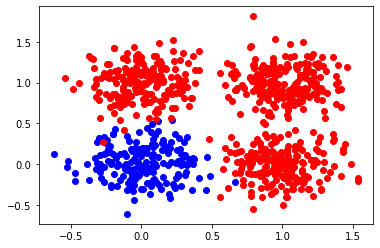

In [46]:
resultado_0x = np.array([])
resultado_0y = np.array([])
resultado_1x = np.array([])
resultado_1y = np.array([])

for i in range (len(dataset)):
    if(dataset[i,2] == 0):
        resultado_0x = np.append(resultado_0x,[dataset[i,0]])
        resultado_0y = np.append(resultado_0y,[dataset[i,1]])
    else:
        resultado_1x = np.append(resultado_1x,[dataset[i,0]])
        resultado_1y = np.append(resultado_1y, [dataset[i,1]])

plt.scatter(resultado_1x,resultado_1y, color='blue')
plt.plot()
        
plt.scatter(resultado_0x,resultado_0y, color='red')
plt.plot()

plt.show()

Nessa etapa, iremos dividir a base de dados em um conjunto de treinamento (70%) e um conjunto de teste (30%).

In [47]:
#criando novo dataset aleatório
random.shuffle(dataset)

#pegando o percentual de cada tipo de entrada
n_training = int(0.7*(len(dataset)))

#particionando
training, test = dataset[:n_training,:], dataset[n_training:,:]

for i in range (0, len(test)):
    test[i,0] = float(test[i,0])
    test[i,1] = float(test[i,1])
    test[i,2] = float(test[i,2])
print(test)


[[-0.23436994  0.03978647  1.        ]
 [ 0.01035887  0.19358383  1.        ]
 [ 0.94473929 -0.13145234  0.        ]
 [ 0.91973731  0.05080887  0.        ]
 [ 1.02800469 -0.15938552  0.        ]
 [-0.33000132  0.07234854  1.        ]
 [ 0.09743172  0.24002227  1.        ]
 [ 0.05481746  1.01844515  0.        ]
 [ 0.12052833  0.52761443  1.        ]
 [ 0.26394155  0.32750883  1.        ]
 [ 0.84317999 -0.13718968  0.        ]
 [ 0.07848856  1.18246746  0.        ]
 [ 1.10627429  0.09651013  0.        ]
 [ 0.83803793  0.04315289  0.        ]
 [-0.26329819  0.12863801  1.        ]
 [ 0.22481021  1.51639247  0.        ]
 [-0.1576937   0.74716362  0.        ]
 [-0.19908835  0.12926358  1.        ]
 [-0.00611016  0.98088605  0.        ]
 [ 0.94638468 -0.11127977  0.        ]
 [-0.19292358  0.62582032  0.        ]
 [-0.05213949 -0.05768201  1.        ]
 [-0.05039096 -0.43980938  1.        ]
 [ 0.15207387 -0.1526586   1.        ]
 [ 0.97086504 -0.10384581  0.        ]
 [-0.23407656  1.2252262 

Definidos os conjuntos de treinamento e de teste, será dado início a criação das funções responsáveis pelo aprendizado do neurônio.

In [48]:
def iniciar_pesos(inicio,fim):
    pesos = np.array([random.uniform(inicio,fim),random.uniform(inicio,fim),random.uniform(inicio,fim)])
    return pesos

In [49]:
def soma(entradas,pesos):
    return(np.dot(entradas,pesos))

In [50]:
def ativacao(saida):
    if(saida >= 0):
        return 1
    else:
        return 0

In [51]:
def ajusta(pesos_atuais, yd, y, x):
    taxa = 0.1
    erro = (yd-y)
    mult = taxa*erro
    result = pesos + np.dot(mult,x)
    return result

In [52]:
def aprender(pesos):
    n = len(training)

    for i in range(0,n):
        soma_saida = soma(np.array([-1, training[i,0], training[i,1]]),pesos) 
        y = ativacao(soma_saida)
        
        if(y != training[i,2]):
            pesos = ajusta(pesos,training[i,2],y,np.array([-1, training[i,0], training[i,1]]))
    return pesos

In [53]:
pesos = iniciar_pesos(-0.5,0.5)

In [54]:
for i in range(0,100):
    resultado = aprender(pesos)
    pesos = resultado
    np.random.shuffle(training)
    print(training)
    

[[-0.20389569  0.36597829  1.        ]
 [ 0.06747976  0.85670159  0.        ]
 [-0.07722405  0.18953338  1.        ]
 ...
 [ 0.09475184  0.00442865  1.        ]
 [ 0.07988839  0.21101297  1.        ]
 [ 0.01035887  0.19358383  1.        ]]
[[-0.0547258  -0.11131214  1.        ]
 [ 0.08298076  0.12868493  1.        ]
 [ 0.08298076  0.12868493  1.        ]
 ...
 [ 0.04322791 -0.0461912   1.        ]
 [ 0.02409823  0.16569508  1.        ]
 [ 0.04070907  0.1350255   1.        ]]
[[ 0.05786483 -0.36451414  1.        ]
 [-0.29356844  0.00599321  1.        ]
 [-0.06775393 -0.12753433  1.        ]
 ...
 [-0.2175649  -0.24798023  1.        ]
 [ 0.20851547  0.87522108  0.        ]
 [-0.09584345  0.81676209  0.        ]]
[[ 0.10964344  0.67482285  0.        ]
 [ 0.46304142  0.09405471  1.        ]
 [-0.20389569  0.36597829  1.        ]
 ...
 [ 0.26482475  0.03523472  1.        ]
 [-0.13057195 -0.14399009  1.        ]
 [-0.1753094  -0.26744178  1.        ]]
[[-0.46833414 -0.10620722  1.        ]
 

 [-0.62237404  0.12119507  1.        ]]
[[ 0.07936731 -0.18897409  1.        ]
 [ 1.05852768 -0.11818869  0.        ]
 [ 0.08562892 -0.17567279  1.        ]
 ...
 [ 0.19643799  0.20349331  1.        ]
 [-0.01442025 -0.02745483  1.        ]
 [-0.11966564 -0.05239423  1.        ]]
[[ 0.03645874 -0.23372151  1.        ]
 [-0.10391518  0.34638192  1.        ]
 [-0.21748562  0.03151915  1.        ]
 ...
 [-0.08041492 -0.18693755  1.        ]
 [-0.25504586  0.25995271  1.        ]
 [-0.027351   -0.14271275  1.        ]]
[[-0.29322959 -0.09065359  1.        ]
 [-0.02088851  0.14046572  1.        ]
 [ 0.0971824   1.07365817  0.        ]
 ...
 [ 1.13637183 -0.09968278  0.        ]
 [-0.01465206  0.12680101  1.        ]
 [-0.26329819  0.12863801  1.        ]]
[[-0.10259311 -0.06961393  1.        ]
 [-0.26329819  0.12863801  1.        ]
 [-0.04347767 -0.18293735  1.        ]
 ...
 [ 0.32606995  0.33196305  1.        ]
 [-0.06282733 -0.32877261  1.        ]
 [ 0.91799501 -0.08656244  0.        ]]


Depois do treinamento usaremos as saídas treinadas e as saídas de teste para gerar os gráficos e as respostas das questões levantadas no enunciado do projeto.

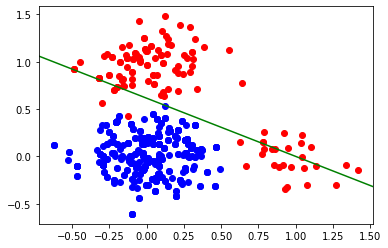

In [55]:
resultado_0x = np.array([])
resultado_0y = np.array([])
resultado_1x = np.array([])
resultado_1y = np.array([])

for i in range (len(training)):
    if(training[i,2] == 0):
        resultado_0x = np.append(resultado_0x,[training[i,0]])
        resultado_0y = np.append(resultado_0y,[training[i,1]])
    else:
        resultado_1x = np.append(resultado_1x,[training[i,0]])
        resultado_1y = np.append(resultado_1y, [training[i,1]])

plt.scatter(resultado_1x,resultado_1y, color='blue')
plt.plot()
        
plt.scatter(resultado_0x,resultado_0y, color='red')
plt.plot()

x2 = (pesos[0]/pesos[2])
x1 = (pesos[0]/pesos[2])/(pesos[1]/pesos[2]) 

plt.axline([x1,0],[0,x2],color='green')
plt.show()


## Realizando Testes

A matriz de confusão prevista do neurônio é a seguinte:

In [58]:
matriz_conf = np.zeros((2,2))
for i in range(0,len(test)):
    soma_saida = soma(np.array([-1, test[i,0], test[i,1]]),pesos) 
    y = ativacao(soma_saida)
    
    if(y==1 and test[i,2]==1):
        matriz_conf[0][0]+=1
    elif(y==1 and test[i,2]==0):
        matriz_conf[0][1]+=1
    elif(y==0 and test[i,2]==0):
        matriz_conf[1][1]+=1
    elif(y==0 and test[i,2]==1):
        matriz_conf[1][0]+=1
            
print(matriz_conf) 

[[ 60.  42.]
 [  1. 137.]]


Para realizar as métricas de avaliação os valores das variáveis True Positive (TP), True False (TF), False Positive (FP) e False Negativa (FN) foram inicializados.

In [ ]:
tp= matriz_conf[0][0]
tn= matriz_conf[1][1]
fp=matriz_conf[0][1]
fn=matriz_conf[1][0]

Baseada na matriz de confusão mostrada anteriormente, a acurácia aprensetada é:

In [60]:
acuracia = ((tp+tn)/(tp+tn+fp+fn))

print(acuracia)

0.8208333333333333


Seguindo com as métricas de avaliação dos neurônio obtemos os seguintes valores para **precisão**, **revocação** e **F-Score**

In [65]:
prec = (tp/(tp+fp))
rev= (tp/(tp+fn))
fscore=(2*(prec*rev)/prec*rev)

print("O valor da Precisão é:",prec)
print("O valor da Revocação é:",rev)
print("O valor do F-Score é:",fscore)

O valor da Precisão é: 0.5882352941176471
O valor da Revocação é: 0.9836065573770492
O valor do F-Score é: 1.934963719430261
